<div style="float:right; padding-top: 15px; padding-right: 15px">
    <div>
        <a href="https://whiteboxml.com">
            <img src="https://whiteboxml.com/static/img/logo/black_bg_white.svg" width="250">
        </a>
    </div>
</div>

## 0. python imports & setup

for learning purposes, libraries will be imported inside its corresponding usage section...

## 1. data loading

In [1]:
import random
import pandas as pd
import numpy as np

In [8]:
def rolling_a_dice(x):
    dice_options = [1,2,3,4,5,6]
    dice_results = random.choices(dice_options, k=x)
    return pd.DataFrame(dice_results, columns=['results'])

dice_df = rolling_a_dice(10)

In [9]:
dice_df

,results
0,1
1,6
2,4
3,4
4,2
5,1
6,3
7,5
8,5
9,6


<AxesSubplot:>

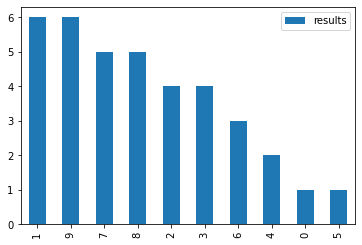

In [10]:
dice_df.sort_values(by='results', ascending=False).plot.bar()

* diamonds: labeled data we can use for training and testing
* diamonds_predict: diamonds to predict its price and upload result to Kaggle

In [21]:
diamonds = pd.read_csv('../data/train/diamonds_train.csv', index_col=[0])
diamonds
diamonds_predict = pd.read_csv('../data/test/diamonds_test.csv')

In [3]:
diamonds.head().T

,0,1,2,3,4
index_id,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,41667f6e2629360aecaf00b20f8732e3310417ebd54b24...,01f8667f50d52677bea23231a74156e4f92360d7bc3db6...,c3867352aab641358faec75d733af012dbe2259a014ea8...,0da4b104c4d8589fcb96a03aa0787549a2631935b0f499...
depth,62.4,61.6,62.3,59.6,60.2
table,58.0,58.0,58.0,60.0,62.0
x,6.83,6.4,5.86,7.58,5.4
y,6.79,6.35,5.8,7.48,5.33
z,4.25,3.93,3.63,4.49,3.23
price,4268,3513,1792,7553,1176
carat,1.21,1.02,0.77,1.51,0.57
cut,Premium,Premium,Premium,Premium,Premium
color,J,J,J,J,J


as you can see, there are both categorical and numerical columns...

## 2. eda

this section is up to you! this guided lesson is about a machine learning pipeline...

## 3. ml preprocessing

in this section I will teach how to use scikit-learn's Pipiline and ColumnTransformer, one of the best practices for composing preprocessing and modeling in a single and elegand class... pay attention as it is hard to understand...

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

* https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
* https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

let's identify numerical and categorical features...

In [5]:
NUM_FEATS = ['carat', 'depth', 'table', 'x', 'y', 'z']
CAT_FEATS = ['cut', 'color', 'clarity']
FEATS = NUM_FEATS + CAT_FEATS
TARGET = 'price'

let's define a preprocessing transformer for numerical columns...

In [6]:
numeric_transformer = \
Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), 
                ('scaler', StandardScaler())])

let's define a preprocessing transformer for categorical columns...

In [7]:
categorical_transformer = \
Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

let's join these transformers using a `ColumnTransformer`:

In [8]:
preprocessor = \
ColumnTransformer(transformers=[('num', numeric_transformer, NUM_FEATS),
                                ('cat', categorical_transformer, CAT_FEATS)])

inspecting the full preprocessor:

In [9]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['carat', 'depth', 'table', 'x', 'y', 'z']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['cut', 'color', 'clarity'])])

In [10]:
diamonds

,index_id,depth,table,x,y,z,price,carat,cut,color,clarity,city
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,4268,1.21,Premium,J,VS2,Dubai
1,41667f6e2629360aecaf00b20f8732e3310417ebd54b24...,61.6,58.0,6.40,6.35,3.93,3513,1.02,Premium,J,VS2,Dubai
2,01f8667f50d52677bea23231a74156e4f92360d7bc3db6...,62.3,58.0,5.86,5.80,3.63,1792,0.77,Premium,J,VS2,Dubai
3,c3867352aab641358faec75d733af012dbe2259a014ea8...,59.6,60.0,7.58,7.48,4.49,7553,1.51,Premium,J,VS2,Dubai
4,0da4b104c4d8589fcb96a03aa0787549a2631935b0f499...,60.2,62.0,5.40,5.33,3.23,1176,0.57,Premium,J,VS2,Dubai
...,...,...,...,...,...,...,...,...,...,...,...,...
40450,3df6f3da962b819057888dbbe3cf4d11f9a59261ba0af7...,62.2,54.0,5.24,5.27,3.27,2729,0.54,Ideal,F,IF,Surat
40451,e5bc95d36abda5bfd67641eca60f2ab92f37b27c0397e0...,61.9,54.0,5.22,5.25,3.24,2802,0.53,Ideal,F,IF,Surat
40452,5ad0fcca0db9b3d399e31a3d909a1a3f4da38c663256b3...,62.3,55.0,4.30,4.34,2.69,886,0.30,Ideal,F,IF,Surat
40453,c8559278b1ac356e1e414320a4efbbe788dc16623e7873...,60.9,55.0,4.15,4.23,2.55,768,0.26,Ideal,F,IF,Surat


how does this preprocessing looks like?

at least in this case, it is at the cost of interpretability of transformed DataFrame...

In [11]:
pd.DataFrame(data=preprocessor.fit_transform(diamonds)).head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.867006,0.452019,0.247981,0.978807,0.921985,1.022657,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.467458,-0.106755,0.247981,0.596394,0.538254,0.563582,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.058262,0.382172,0.247981,0.116154,0.058590,0.133198,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.497870,-1.503688,1.143433,1.645806,1.523746,1.366964,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.478838,-1.084608,2.038886,-0.292939,-0.351305,-0.440646,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [25]:
diamonds

,index_id,depth,table,x,y,z,price,carat,cut,color,clarity,city
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,4268,1.21,Premium,J,VS2,Dubai
1,41667f6e2629360aecaf00b20f8732e3310417ebd54b24...,61.6,58.0,6.40,6.35,3.93,3513,1.02,Premium,J,VS2,Dubai
2,01f8667f50d52677bea23231a74156e4f92360d7bc3db6...,62.3,58.0,5.86,5.80,3.63,1792,0.77,Premium,J,VS2,Dubai
3,c3867352aab641358faec75d733af012dbe2259a014ea8...,59.6,60.0,7.58,7.48,4.49,7553,1.51,Premium,J,VS2,Dubai
4,0da4b104c4d8589fcb96a03aa0787549a2631935b0f499...,60.2,62.0,5.40,5.33,3.23,1176,0.57,Premium,J,VS2,Dubai
...,...,...,...,...,...,...,...,...,...,...,...,...
40450,3df6f3da962b819057888dbbe3cf4d11f9a59261ba0af7...,62.2,54.0,5.24,5.27,3.27,2729,0.54,Ideal,F,IF,Surat
40451,e5bc95d36abda5bfd67641eca60f2ab92f37b27c0397e0...,61.9,54.0,5.22,5.25,3.24,2802,0.53,Ideal,F,IF,Surat
40452,5ad0fcca0db9b3d399e31a3d909a1a3f4da38c663256b3...,62.3,55.0,4.30,4.34,2.69,886,0.30,Ideal,F,IF,Surat
40453,c8559278b1ac356e1e414320a4efbbe788dc16623e7873...,60.9,55.0,4.15,4.23,2.55,768,0.26,Ideal,F,IF,Surat


## 4. train a simple model

first, lets train a simple model using holdout, train - test split...

In [12]:
from sklearn.model_selection import train_test_split

In [39]:
diamonds_train, diamonds_test = train_test_split(diamonds, random_state=42)

In [40]:
print(diamonds_train.shape)
print(diamonds_test.shape)

(30341, 12)
(10114, 12)


let's choose a model from scikit-learn cheatsheet: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [41]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

model= Pipeline(steps=[('preprocessor', preprocessor),
                       ('regressor', RandomForestRegressor())])

In [42]:
model.fit(diamonds_train[FEATS], diamonds_train[TARGET]);

## 5. check model performance on test and train data

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
y_test = model.predict(diamonds_test[FEATS])
y_train = model.predict(diamonds_train[FEATS])

In [45]:
print(f"test error: {mean_squared_error(y_pred=y_test, y_true=diamonds_test[TARGET], squared=False)}")
print(f"train error: {mean_squared_error(y_pred=y_train, y_true=diamonds_train[TARGET], squared=False)}")

test error: 591.2570985296467
train error: 208.43385474539807


## 6. check model performance using cross validation

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
scores = cross_val_score(model, 
                         diamonds[FEATS], 
                         diamonds[TARGET], 
                         scoring='neg_root_mean_squared_error', 
                         cv=5, n_jobs=-1)

In [30]:
import numpy as np
np.mean(-scores)

561.583608831205

## 7. optimize model using grid search

In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [32]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'regressor__n_estimators': [16, 32, 64, 128, 256, 512],
    'regressor__max_depth': [2, 4, 8, 16],
}

grid_search = RandomizedSearchCV(model, 
                                 param_grid, 
                                 cv=5, 
                                 verbose=10, 
                                 scoring='neg_root_mean_squared_error', 
                                 n_jobs=-1,
                                 n_iter=32)

grid_search.fit(diamonds[FEATS], diamonds[TARGET])

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 2/5; 1/32] START preprocessor__num__imputer__strategy=median, regressor__max_depth=8, regressor__n_estimators=16
[CV 4/5; 1/32] START preprocessor__num__imputer__strategy=median, regressor__max_depth=8, regressor__n_estimators=16
[CV 5/5; 1/32] START preprocessor__num__imputer__strategy=median, regressor__max_depth=8, regressor__n_estimators=16
[CV 1/5; 2/32] START preprocessor__num__imputer__strategy=median, regressor__max_depth=16, regressor__n_estimators=16
[CV 3/5; 2/32] START preprocessor__num__imputer__strategy=median, regressor__max_depth=16, regressor__n_estimators=16
[CV 3/5; 1/32] START preprocessor__num__imputer__strategy=median, regressor__max_depth=8, regressor__n_estimators=16[CV 1/5; 1/32] START preprocessor__num__imputer__strategy=median, regressor__max_depth=8, regressor__n_estimators=16

[CV 2/5; 2/32] START preprocessor__num__imputer__strategy=median, regressor__max_depth=16, regressor__n_estimators=16

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['carat',
                                                                                'depth',
                                                                                'table',
                                                                                'x',
              

In [33]:
grid_search.best_params_

{'regressor__n_estimators': 512,
 'regressor__max_depth': 16,
 'preprocessor__num__imputer__strategy': 'median'}

In [34]:
grid_search.best_score_

-558.2525271641778

## 8. prepare submission

In [ ]:
y_pred = grid_search.predict(diamonds_predict[FEATS])

In [36]:
submission_df = pd.DataFrame({'id': diamonds_predict['id'], 'price': y_pred})

In [37]:
submission_df.head()

,id,price
0,0,2971.080601
1,1,5390.906739
2,2,9224.896126
3,3,4146.470340
4,4,1702.772954


In [38]:
submission_df.describe()

,id,price
count,13485.000000,13485.000000
mean,6742.000000,3953.698282
std,3892.928525,3948.408921
min,0.000000,372.816813
25%,3371.000000,946.589415
50%,6742.000000,2465.620745
75%,10113.000000,5324.154534
max,13484.000000,18197.482120


In [30]:
submission_df.price.clip(0, 20000, inplace=True)

In [31]:
submission_df.to_csv('diamonds_rf.csv', index=False)

## 9. let's try more models...

<div style="padding-top: 25px; float: right">
    <div>    
        <i>&nbsp;&nbsp;© Copyright by</i>
    </div>
    <div>
        <a href="https://whiteboxml.com">
            <img src="https://whiteboxml.com/static/img/logo/black_bg_white.svg" width="125">
        </a>
    </div>
</div>